# Search Queries Anomaly Detection

## Import Data and Check for Null Values, Column Info, and Descriptive Statistics

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

file_path = 'Queries.csv'
df = pd.read_csv(file_path)

null_values = df.isnull().sum()

column_info = df.info()

descriptive_stats = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


## Convert CTR from percentage string to float


In [7]:
df['CTR'] = df['CTR'].str.rstrip('%').astype('float') / 100

print(df)

                                   Top queries  Clicks  Impressions     CTR  \
0                  number guessing game python    5223        14578  0.3583   
1                          thecleverprogrammer    2809         3456  0.8128   
2             python projects with source code    2077        73380  0.0283   
3    classification report in machine learning    2012         4959  0.4057   
4                        the clever programmer    1931         2528  0.7638   
..                                         ...     ...          ...     ...   
995     human activity recognition python code      48          369  0.1301   
996                python contact book project      48          334  0.1437   
997                why standard scaler is used      48          295  0.1627   
998     credit scoring machine learning python      48          243  0.1975   
999                     numpy useful functions      48          166  0.2892   

     Position  
0        1.61  
1        1.02  
2  

## Analyze common words

<Figure size 1000x600 with 0 Axes>

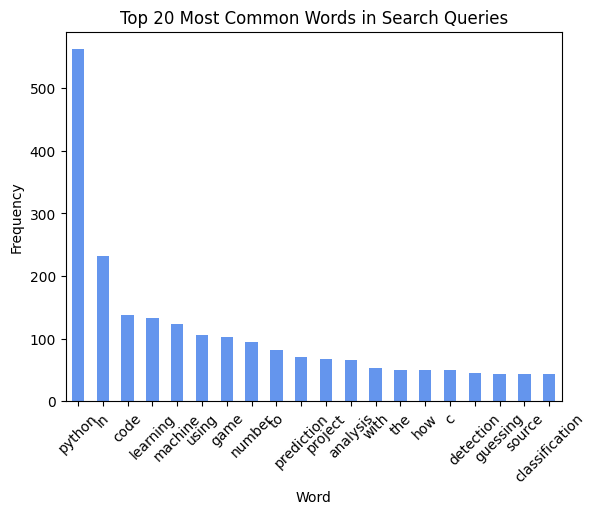

In [52]:
import matplotlib.pyplot as plt
from collections import Counter
import re

def clean_and_split(query):
    cleaned_query = re.sub(r'[^\w\s]', '', query)
    words = cleaned_query.lower().split()
    return words

word_counts = Counter()

for query in df['Top queries']:
    words = clean_and_split(query)
    word_counts.update(words)

word_freq_df = pd.DataFrame(word_counts.most_common(), columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
word_freq_df[:20].plot(kind='bar', x='Word', y='Frequency', legend=False, color='cornflowerblue')
plt.title('Top 20 Most Common Words in Search Queries')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Top queries by clicks and impression

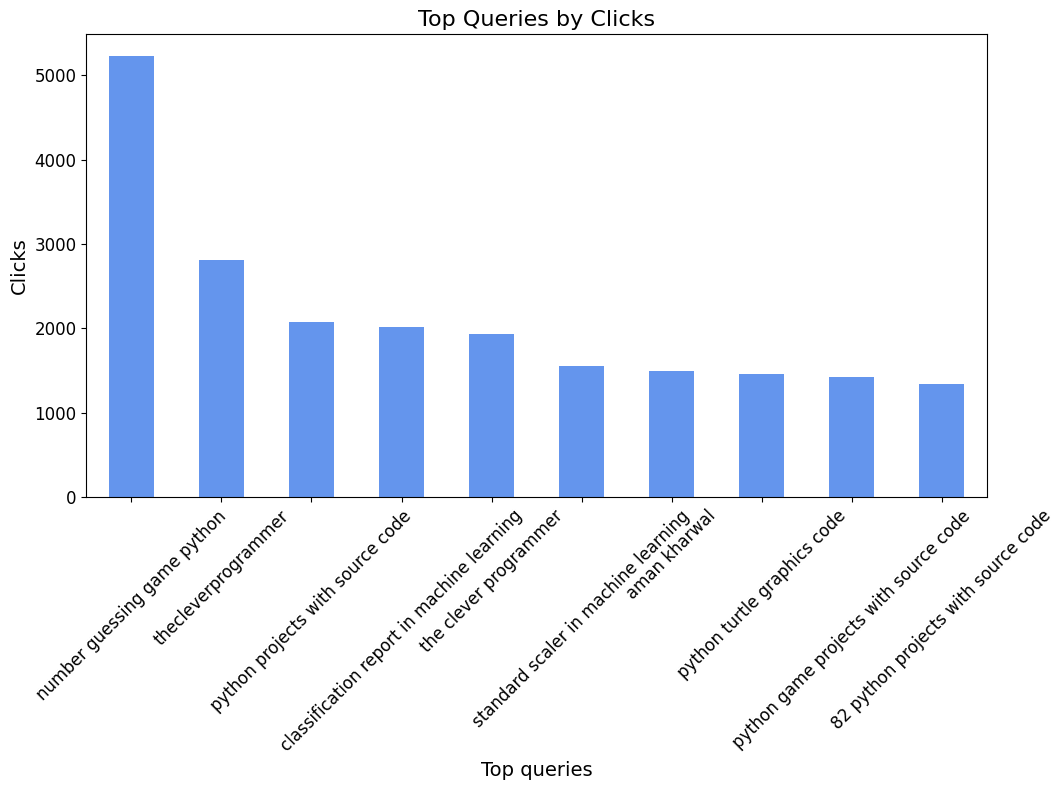

In [48]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
df.sort_values(by='Clicks', ascending=False).head(10).plot(
    kind='bar', x='Top queries', y='Clicks', legend=False, color='cornflowerblue', ax=plt.gca()
)
plt.title('Top Queries by Clicks', fontsize=16)
plt.xlabel('Top queries', fontsize=14)
plt.ylabel('Clicks', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


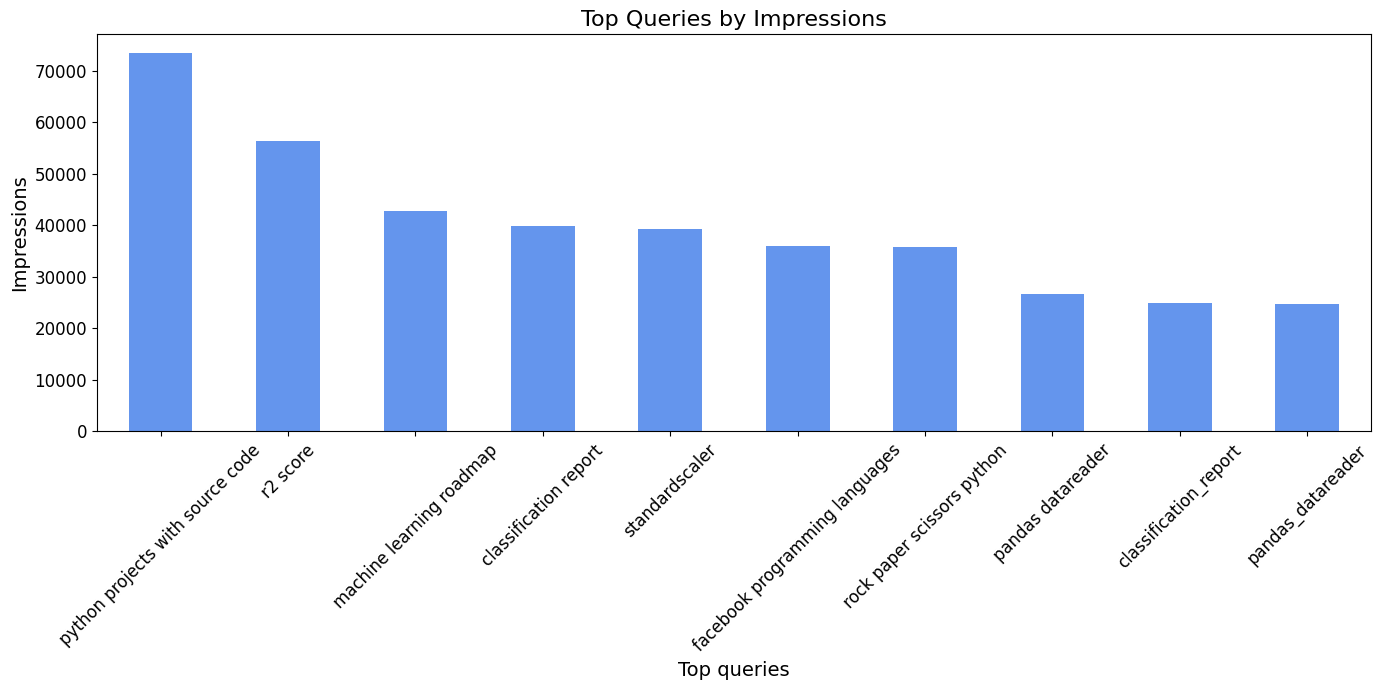

In [45]:
plt.figure(figsize=(14, 7))
df.sort_values(by='Impressions', ascending=False).head(10).plot(
    kind='bar', x='Top queries', y='Impressions', legend=False, color='cornflowerblue', ax=plt.gca()
)
plt.title('Top Queries by Impressions', fontsize=16)
plt.xlabel('Top queries', fontsize=14)
plt.ylabel('Impressions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Analyze queries with highest and lowest CTRs

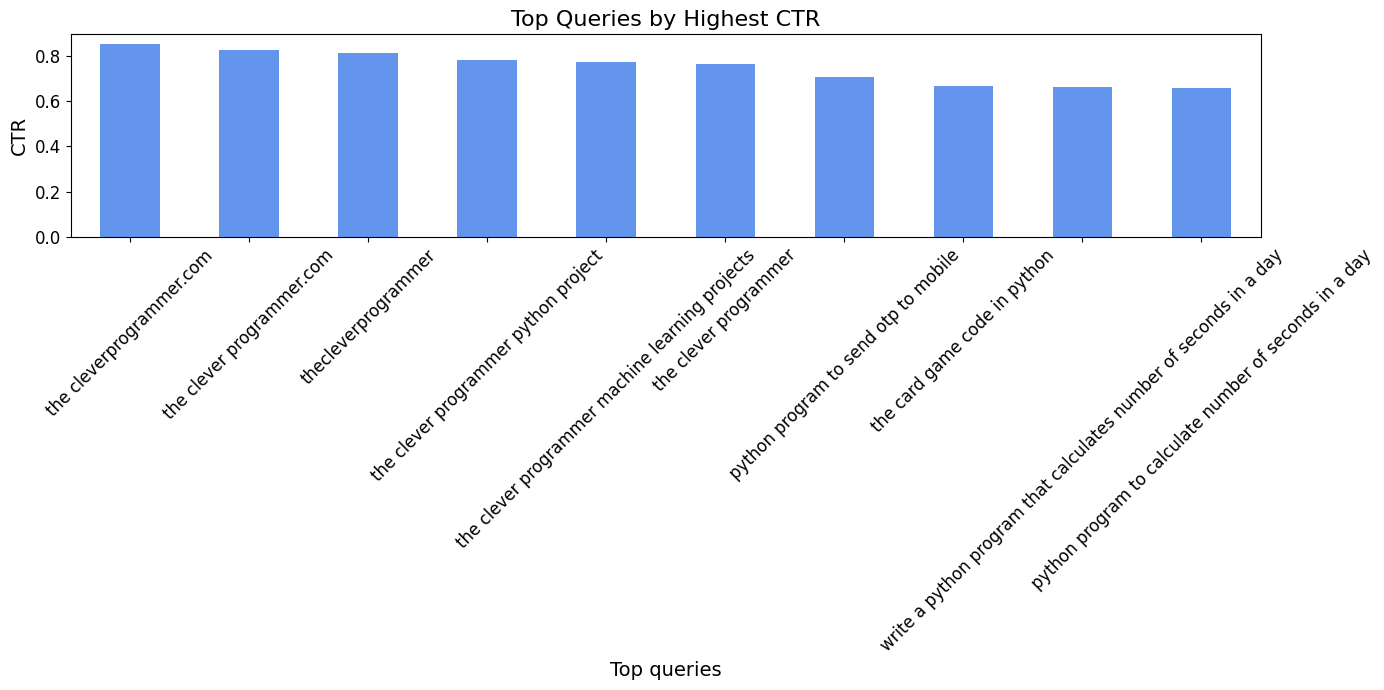

In [53]:
plt.figure(figsize=(14, 7))

df.sort_values(by='CTR', ascending=False).head(10).plot(
    kind='bar', x='Top queries', y='CTR', legend=False, color='cornflowerblue', ax=plt.gca()
)
plt.title('Top Queries by Highest CTR', fontsize=16)
plt.xlabel('Top queries', fontsize=14)
plt.ylabel('CTR', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

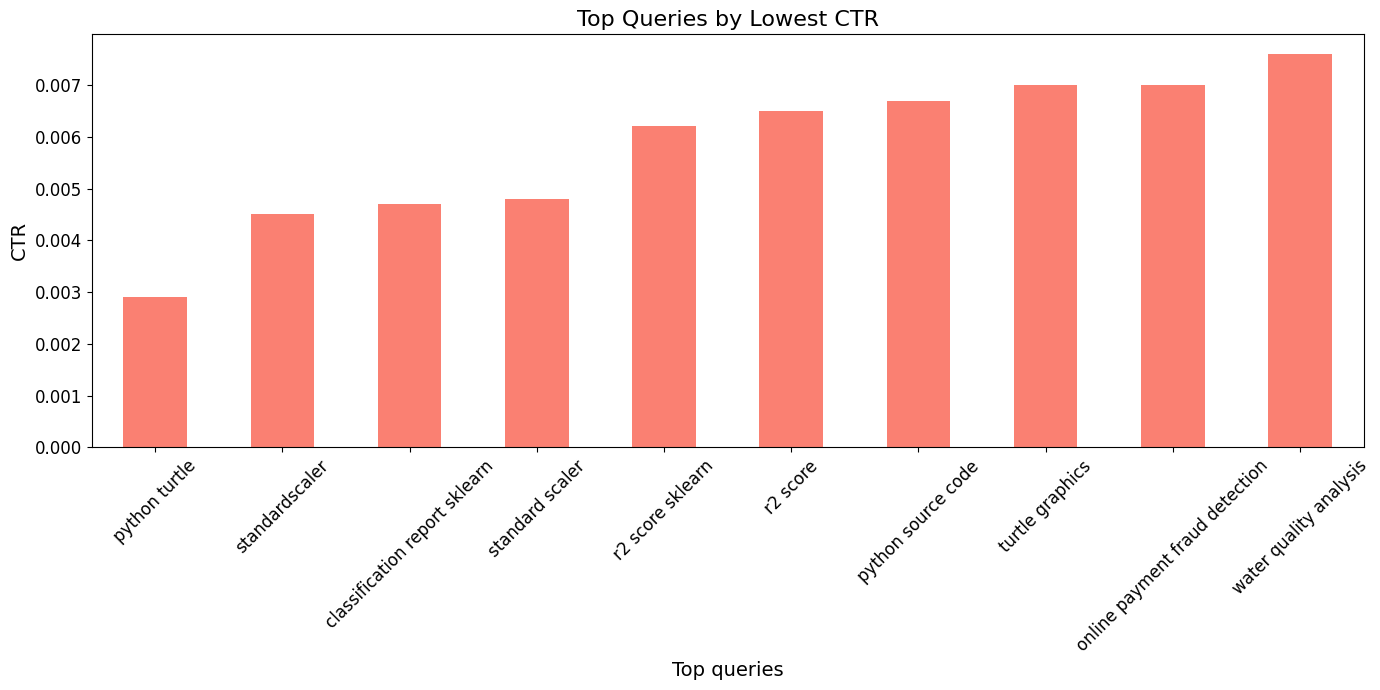

In [54]:
plt.figure(figsize=(14, 7))

df.sort_values(by='CTR', ascending=True).head(10).plot(
    kind='bar', x='Top queries', y='CTR', legend=False, color='salmon', ax=plt.gca()
)
plt.title('Top Queries by Lowest CTR', fontsize=16)
plt.xlabel('Top queries', fontsize=14)
plt.ylabel('CTR', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## Check the correlation between different metrics.

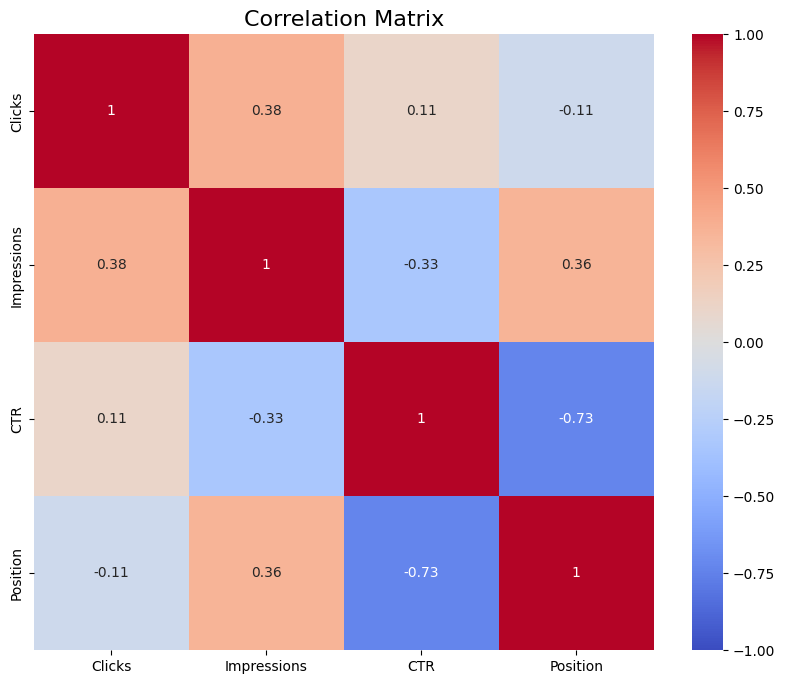

In [55]:
corr_matrix = df[['Clicks', 'Impressions', 'CTR', 'Position']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

## Observations

The data reveals several key relationships between clicks, impressions, click-through rate (CTR), and position. There is a positive correlation (0.377) between clicks and impressions, indicating that as the number of impressions increases, the number of clicks also tends to rise. The relationship between clicks and CTR is slightly positive (0.107), suggesting a weak association, meaning that an increase in clicks does not necessarily result in a significantly higher CTR. Conversely, there is a negative correlation (-0.112) between clicks and position, implying that as the ranking improves (lower position values), the number of clicks slightly increases. 

Furthermore, impressions and CTR show a negative correlation (-0.331), indicating that as impressions increase, the CTR tends to decrease. There is also a positive correlation (0.358) between impressions and position, suggesting that impressions tend to increase as the ranking worsens (higher position values). Lastly, a strong negative correlation (-0.728) between CTR and position indicates that better positions (lower values) are strongly associated with higher CTRs.

## Detect anomalies in search queries

In [57]:
from sklearn.ensemble import IsolationForest
features = ['Clicks', 'Impressions', 'CTR', 'Position']

iso_forest = IsolationForest(contamination=0.05, random_state=42)

df['anomaly'] = iso_forest.fit_predict(df[features])

normal_data = df[df['anomaly'] == 1]
anomalies = df[df['anomaly'] == -1]

C:\Users\92310\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [58]:
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
                                      Top queries  Clicks  Impressions  \
0                     number guessing game python    5223        14578   
1                             thecleverprogrammer    2809         3456   
2                python projects with source code    2077        73380   
3       classification report in machine learning    2012         4959   
4                           the clever programmer    1931         2528   
5             standard scaler in machine learning    1559         7292   
6                                    aman kharwal    1490         5752   
7                     python turtle graphics code    1455        13585   
8           python game projects with source code    1421         4946   
9             82 python projects with source code    1343         3562   
10                        guess the number python    1287         4569   
11                              clever programmer    1243        21566   
12    car price pr

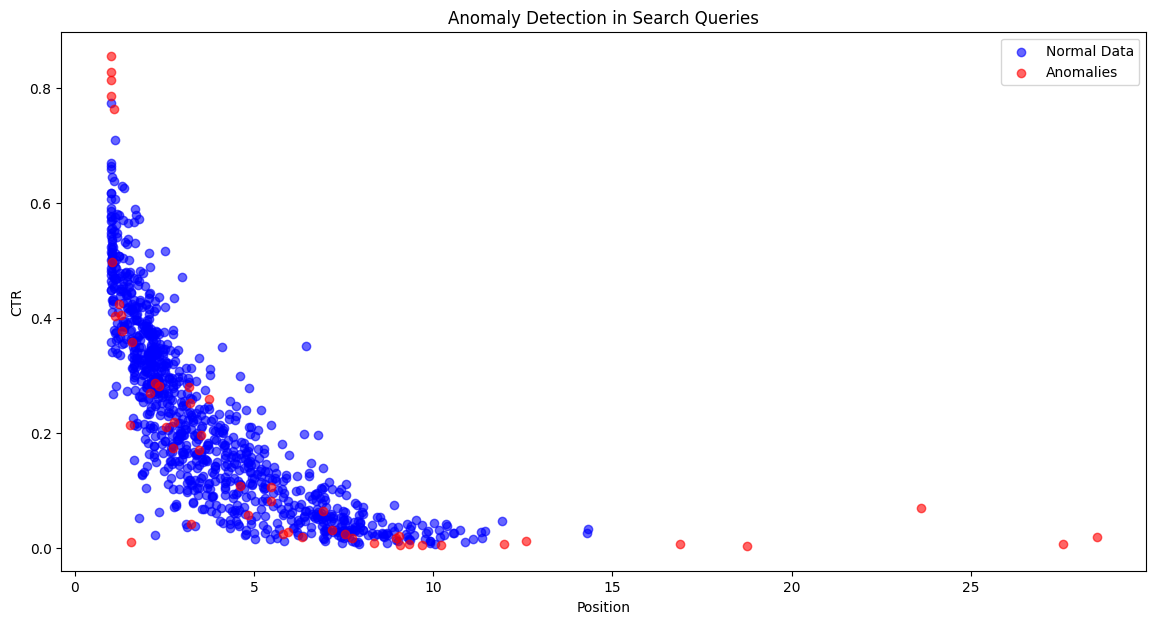

In [59]:
# Normal data vs anomalies
plt.figure(figsize=(14, 7))
plt.scatter(normal_data['Position'], normal_data['CTR'], label='Normal Data', color='blue', alpha=0.6)
plt.scatter(anomalies['Position'], anomalies['CTR'], label='Anomalies', color='red', alpha=0.6)
plt.title('Anomaly Detection in Search Queries')
plt.xlabel('Position')
plt.ylabel('CTR')
plt.legend()
plt.show()